In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter
import mplfinance as mpf
from PIL import Image
import os
from tqdm import tqdm
from scipy import stats

In [2]:
fire_path = 'fire_dataset/fire_images/'
non_fire_path = 'fire_dataset/non_fire_images/'

In [3]:
fire_images = [os.path.join(fire_path, fname) for fname in os.listdir(fire_path) if os.path.isfile(os.path.join(fire_path, fname))]
non_fire_images = [os.path.join(non_fire_path, fname) for fname in os.listdir(non_fire_path) if os.path.isfile(os.path.join(non_fire_path, fname))]

df_fire = pd.DataFrame({'img_path': fire_images, 'label': 1})
df_non_fire = pd.DataFrame({'img_path': non_fire_images, 'label': 0})

df = pd.concat([df_fire, df_non_fire], ignore_index=True)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)


df.head(5)

,img_path,label
0,fire_dataset/fire_images/fire.507.png,1
1,fire_dataset/non_fire_images/non_fire.133.png,0
2,fire_dataset/fire_images/fire.288.png,1
3,fire_dataset/fire_images/fire.378.png,1
4,fire_dataset/fire_images/fire.86.png,1


In [4]:
df

,img_path,label
0,fire_dataset/fire_images/fire.507.png,1
1,fire_dataset/non_fire_images/non_fire.133.png,0
2,fire_dataset/fire_images/fire.288.png,1
3,fire_dataset/fire_images/fire.378.png,1
4,fire_dataset/fire_images/fire.86.png,1
...,...,...
994,fire_dataset/fire_images/fire.195.png,1
995,fire_dataset/fire_images/fire.342.png,1
996,fire_dataset/non_fire_images/non_fire.194.png,0
997,fire_dataset/fire_images/fire.491.png,1


In [5]:
df

,img_path,label
0,fire_dataset/fire_images/fire.507.png,1
1,fire_dataset/non_fire_images/non_fire.133.png,0
2,fire_dataset/fire_images/fire.288.png,1
3,fire_dataset/fire_images/fire.378.png,1
4,fire_dataset/fire_images/fire.86.png,1
...,...,...
994,fire_dataset/fire_images/fire.195.png,1
995,fire_dataset/fire_images/fire.342.png,1
996,fire_dataset/non_fire_images/non_fire.194.png,0
997,fire_dataset/fire_images/fire.491.png,1


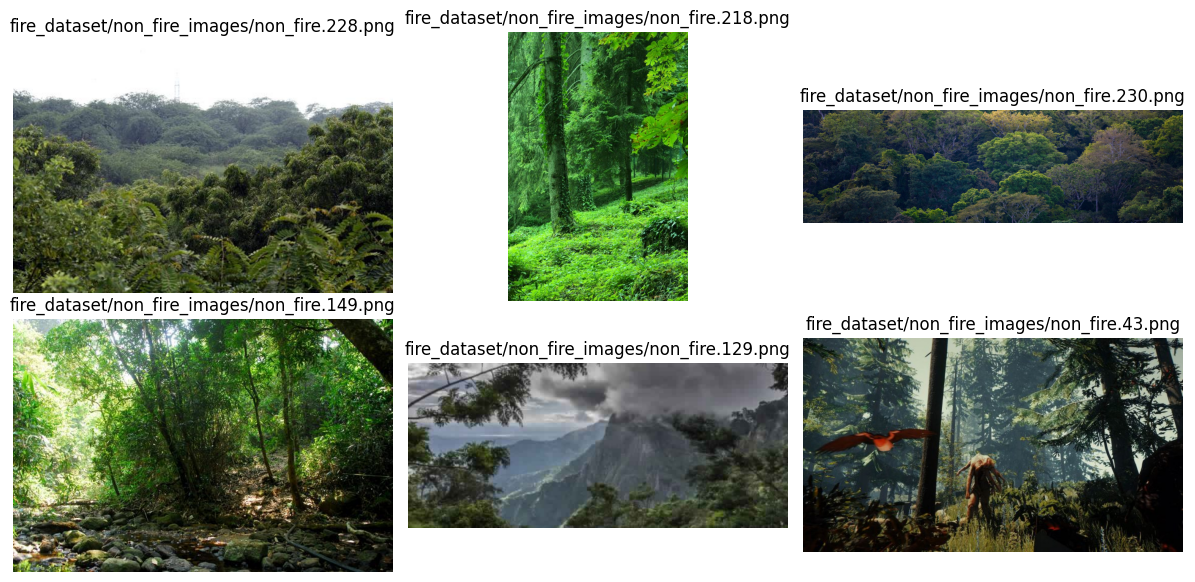

In [19]:
df_temp_list = df[df['label'] == 0][5:].head(6)

plt.figure(figsize=(12, 6))

for i, path in enumerate(df_temp_list['img_path']):
    img = Image.open(path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"{path}")
    plt.axis('off')

plt.tight_layout()
plt.show()

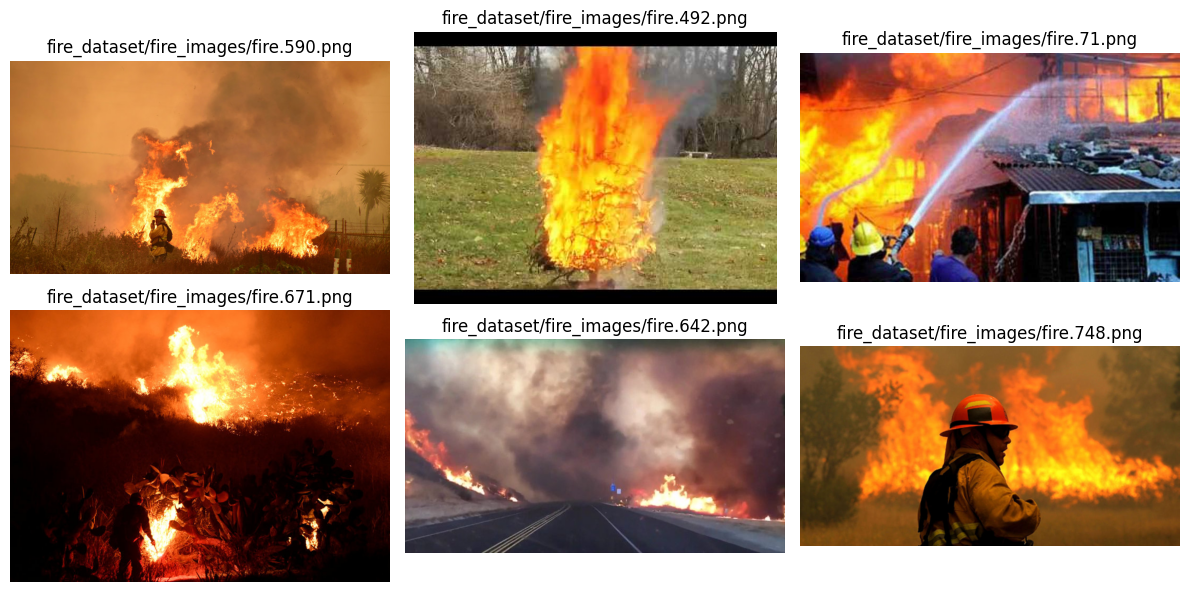

In [20]:
df_temp_list = df[df['label'] == 1][5:].head(6)

plt.figure(figsize=(12, 6))

for i, path in enumerate(df_temp_list['img_path']):
    img = Image.open(path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"{path}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def add_pixel_cols(df_input, threshold=0):
    from tqdm import tqdm
    from PIL import Image
    import numpy as np
    import pandas as pd

    red_pixels_list = []
    green_pixels_list = []
    blue_pixels_list = []
    gray_pixels_list = []
    img_width_list = []
    img_height_list = []

    stat_cols = ['Mean', 'Var', 'Q1', 'Median', 'Q3', 'Min', 'Max', 'Count','Contrast', 'Range']
    red_stats = {stat: [] for stat in stat_cols}
    green_stats = {stat: [] for stat in stat_cols}
    blue_stats = {stat: [] for stat in stat_cols}
    gray_stats = {stat: [] for stat in stat_cols}

    for path in tqdm(df_input['img_path']):
        img_rgb = Image.open(path).convert('RGB')
        arr_rgb = np.array(img_rgb)

        red = arr_rgb[:, :, 0].flatten().astype(np.uint8)
        green = arr_rgb[:, :, 1].flatten().astype(np.uint8)
        blue = arr_rgb[:, :, 2].flatten().astype(np.uint8)
        gray = np.array(img_rgb.convert('L')).flatten().astype(np.uint8)

        red_pixels_list.append(red)
        green_pixels_list.append(green)
        blue_pixels_list.append(blue)
        gray_pixels_list.append(gray)

        img_width_list.append(img_rgb.width)
        img_height_list.append(img_rgb.height)

        def compute_stats(arr):
            return {
                'Mean': arr.mean(),
                'Var': arr.var(),
                'Q1': np.percentile(arr, 25),
                'Median': np.median(arr),
                'Q3': np.percentile(arr, 75),
                'Min': arr.min(),
                'Max': arr.max(),
                'Count': np.sum(arr > threshold),
                'Contrast': np.std(arr),
                'Range': arr.max() - arr.min()
            }

        for stat, val in compute_stats(red).items():
            red_stats[stat].append(val)
        for stat, val in compute_stats(green).items():
            green_stats[stat].append(val)
        for stat, val in compute_stats(blue).items():
            blue_stats[stat].append(val)
        for stat, val in compute_stats(gray).items():
            gray_stats[stat].append(val)

    # Store pixel arrays
    df_input['Red_Pixels'] = red_pixels_list
    df_input['Green_Pixels'] = green_pixels_list
    df_input['Blue_Pixels'] = blue_pixels_list
    df_input['Gray_Pixels'] = gray_pixels_list
    df_input['Image_Width'] = img_width_list
    df_input['Image_Height'] = img_height_list

    # Store computed stats
    for stat in stat_cols:
        df_input[f'Red_{stat}'] = red_stats[stat]
        df_input[f'Green_{stat}'] = green_stats[stat]
        df_input[f'Blue_{stat}'] = blue_stats[stat]
        df_input[f'Gray_{stat}'] = gray_stats[stat]

    return df_input


In [7]:
df_preprocessed = add_pixel_cols(df, 10)

100%|██████████| 999/999 [02:03<00:00,  8.09it/s]


In [8]:
df_fire = df_preprocessed[df_preprocessed['label'] == 1].copy()
df_non_fire = df_preprocessed[df_preprocessed['label'] == 0].copy()

In [9]:
df_preprocessed['label_name'] = df_preprocessed['label'].map({1: 'Cháy', 0: 'Không cháy'})

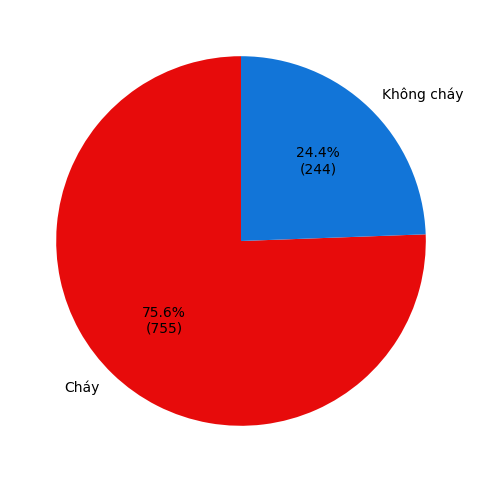

In [10]:
plt.figure(figsize=(10, 6))
counts = df['label_name'].value_counts()

def autopct_format(pct):
    total = sum(counts)
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count:,})'

plt.pie(
    counts,
    labels=counts.index,
    autopct=autopct_format,
    startangle=90,
    colors=["#e70b0b", "#1275d8"]
)

plt.show()


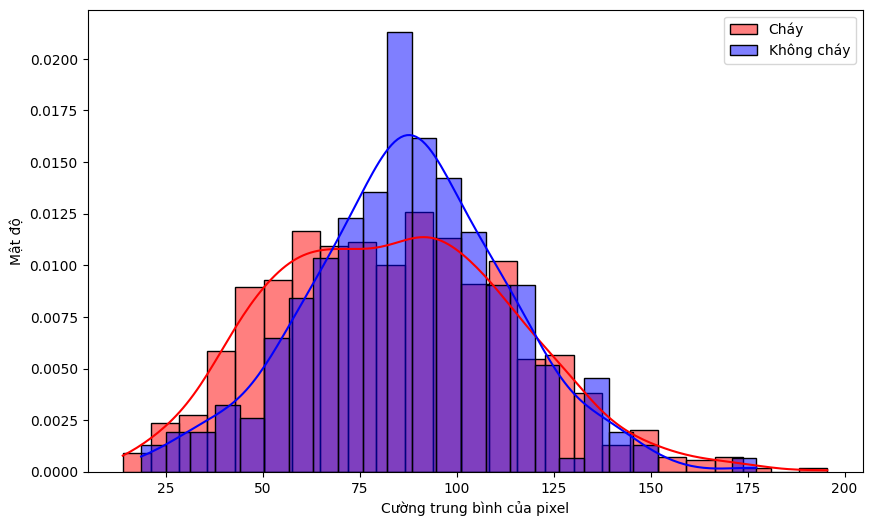

In [11]:
# plot mean gray pixels
plt.figure(figsize=(10, 6))
sns.histplot(df_fire['Gray_Mean'], color='red', label='Cháy', kde=True, stat='density', bins=25)
sns.histplot(df_non_fire['Gray_Mean'], color='blue', label='Không cháy', kde=True, stat='density', bins=25)

plt.xlabel('Cường trung bình của pixel')
plt.ylabel('Mật độ')
plt.legend()
plt.show()

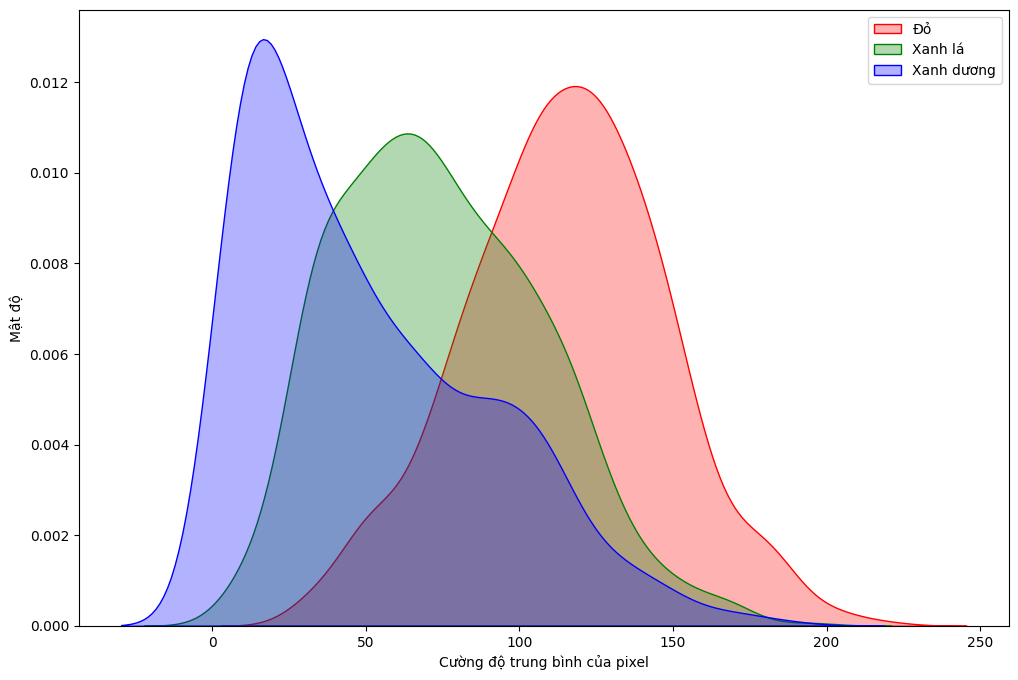

In [12]:
# kde of red, green, blue, gray pixels of fire images
plt.figure(figsize=(12, 8))
sns.kdeplot(df_fire['Red_Mean'], color='red', label='Đỏ', fill=True, alpha=0.3)
sns.kdeplot(df_fire['Green_Mean'], color='green', label='Xanh lá', fill=True, alpha=0.3)
sns.kdeplot(df_fire['Blue_Mean'], color='blue', label='Xanh dương', fill=True, alpha=0.3)
plt.xlabel('Cường độ trung bình của pixel')
plt.ylabel('Mật độ')
plt.legend()
plt.show()

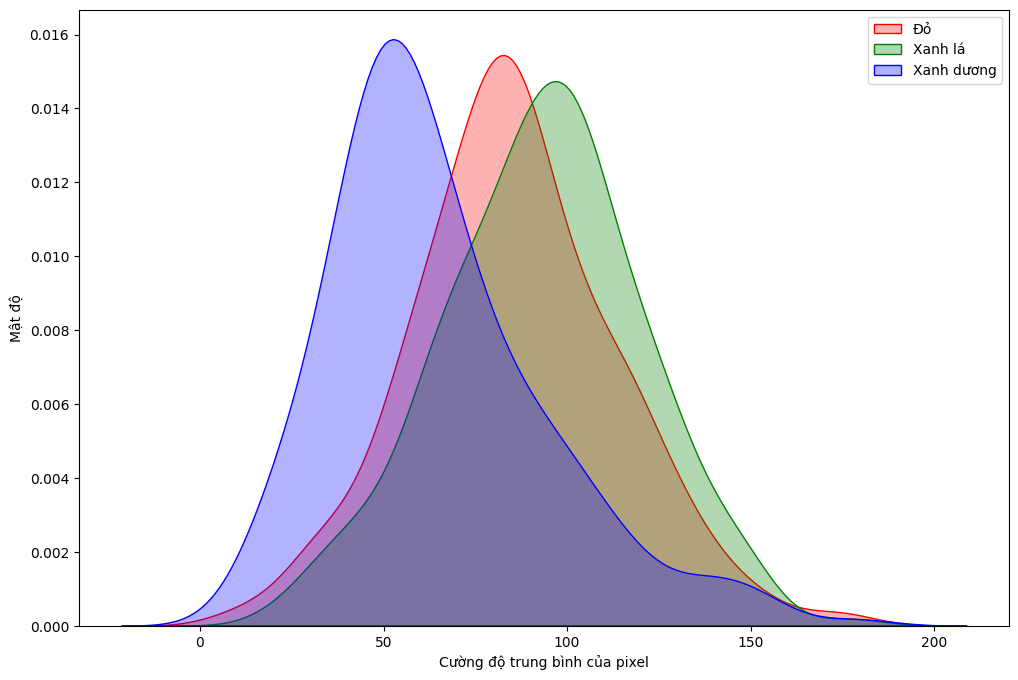

In [13]:
# kde of red, green, blue, gray pixels of fire images
plt.figure(figsize=(12, 8))
sns.kdeplot(df_non_fire['Red_Mean'], color='red', label='Đỏ', fill=True, alpha=0.3)
sns.kdeplot(df_non_fire['Green_Mean'], color='green', label='Xanh lá', fill=True, alpha=0.3)
sns.kdeplot(df_non_fire['Blue_Mean'], color='blue', label='Xanh dương', fill=True, alpha=0.3)
plt.xlabel('Cường độ trung bình của pixel')
plt.ylabel('Mật độ')
plt.legend()
plt.show()